Outer fold iteration: 1/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


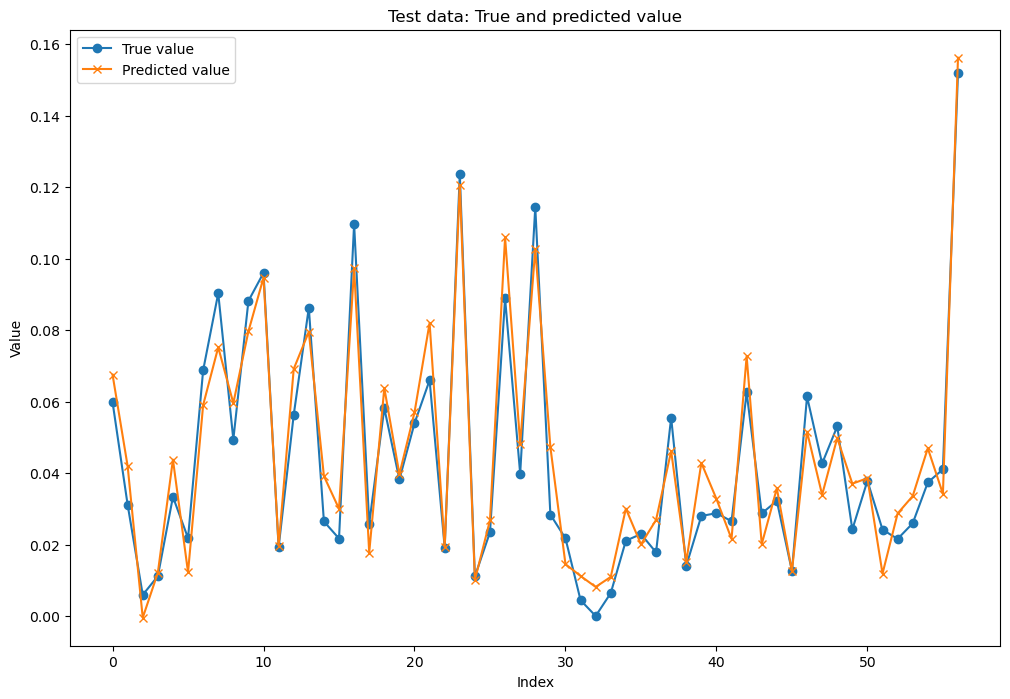

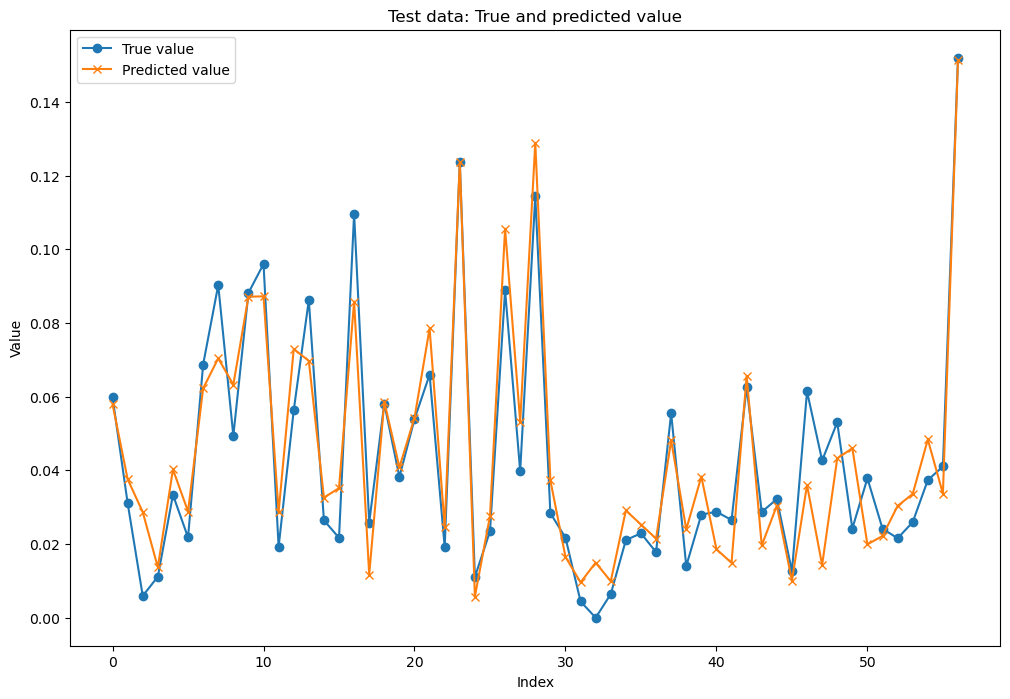

Outer fold iteration: 2/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


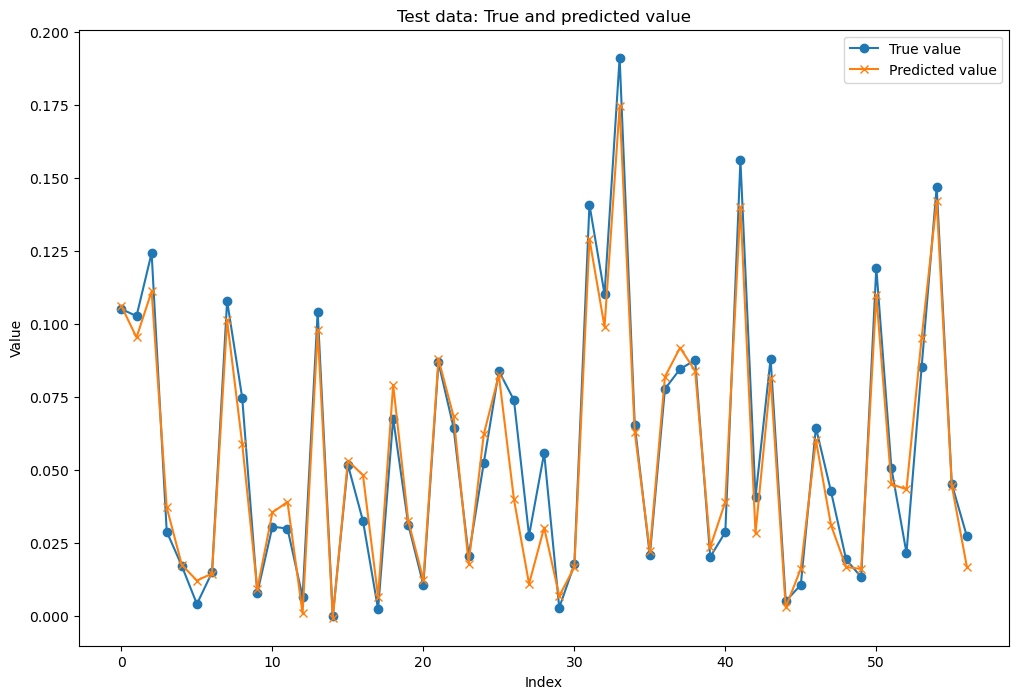

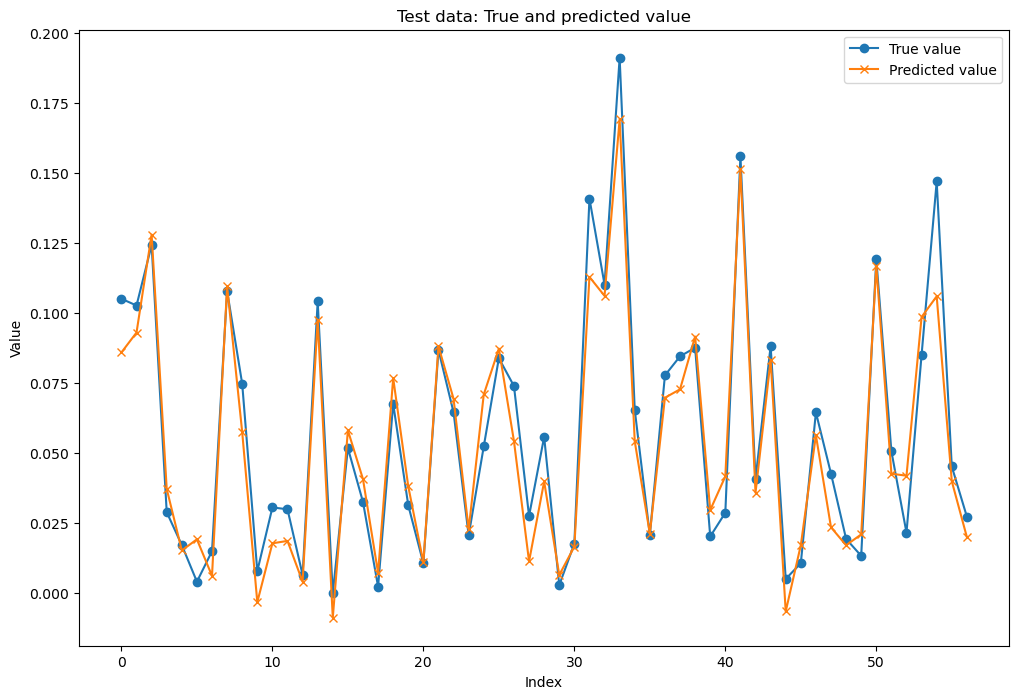

Outer fold iteration: 3/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


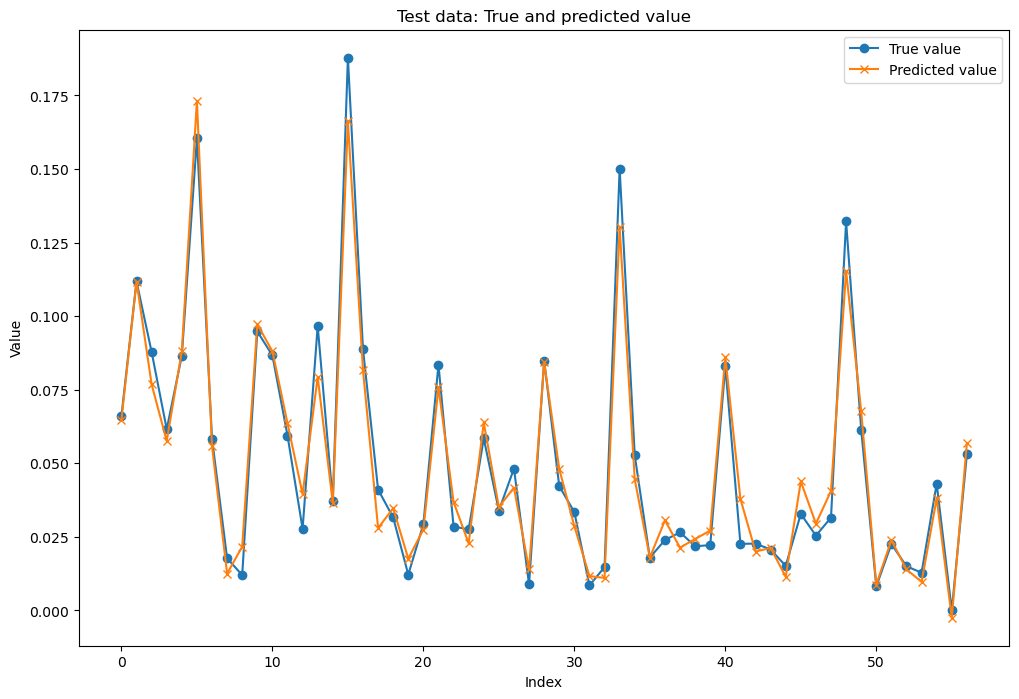

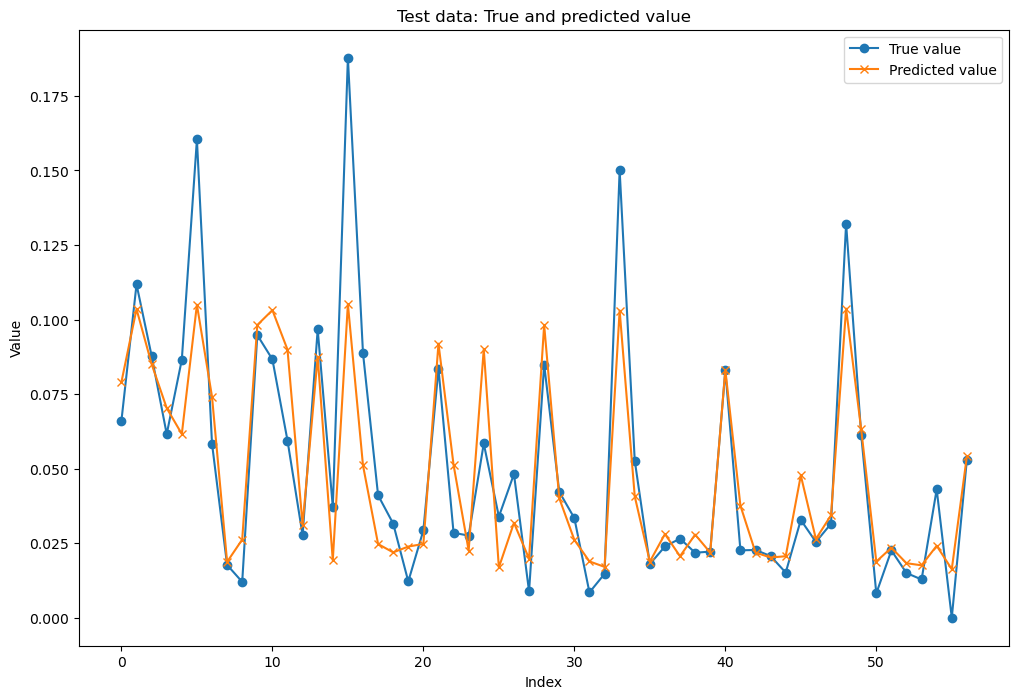

Outer fold iteration: 4/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


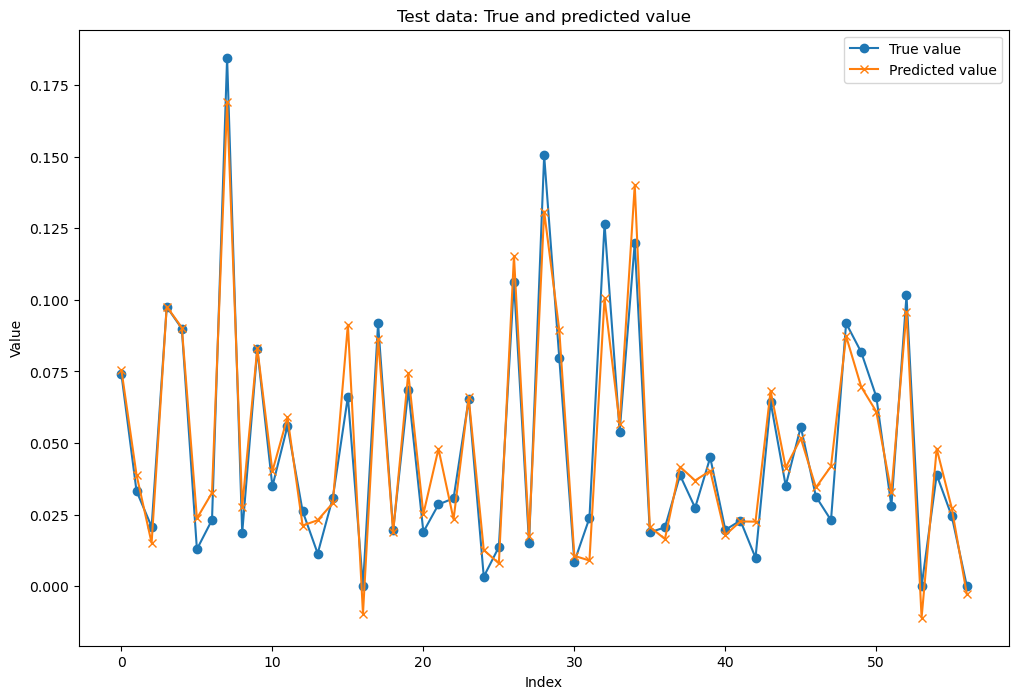

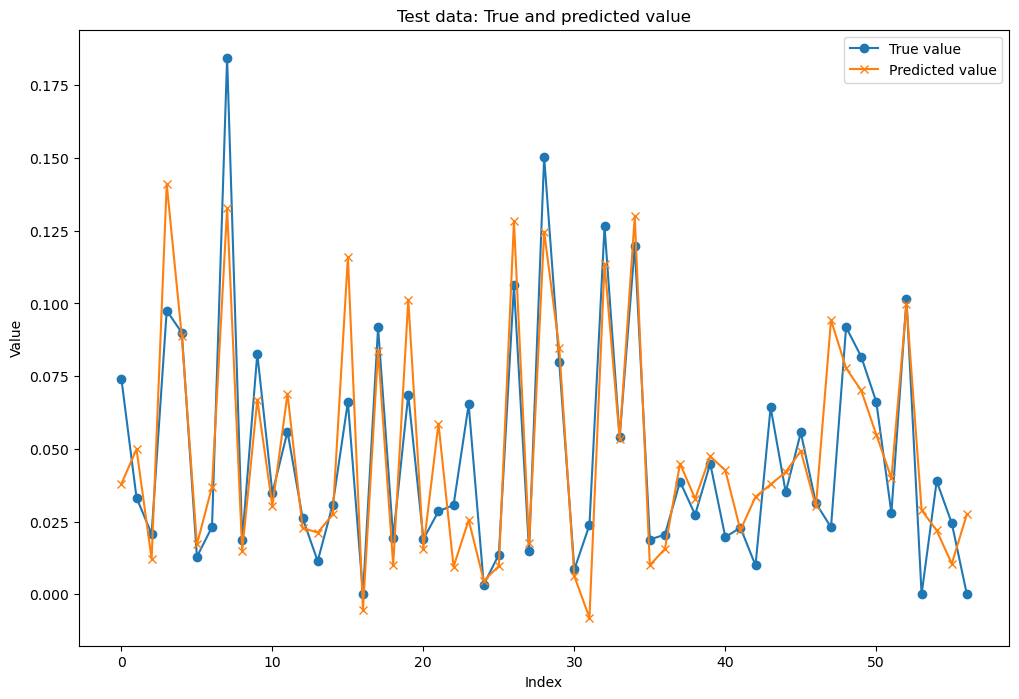

Outer fold iteration: 5/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


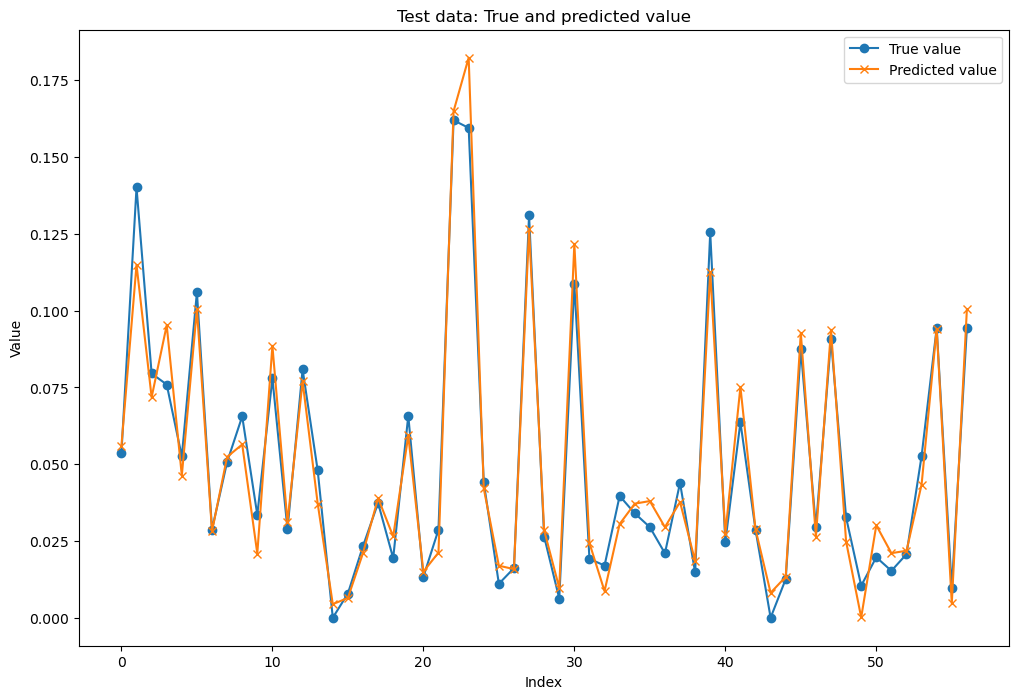

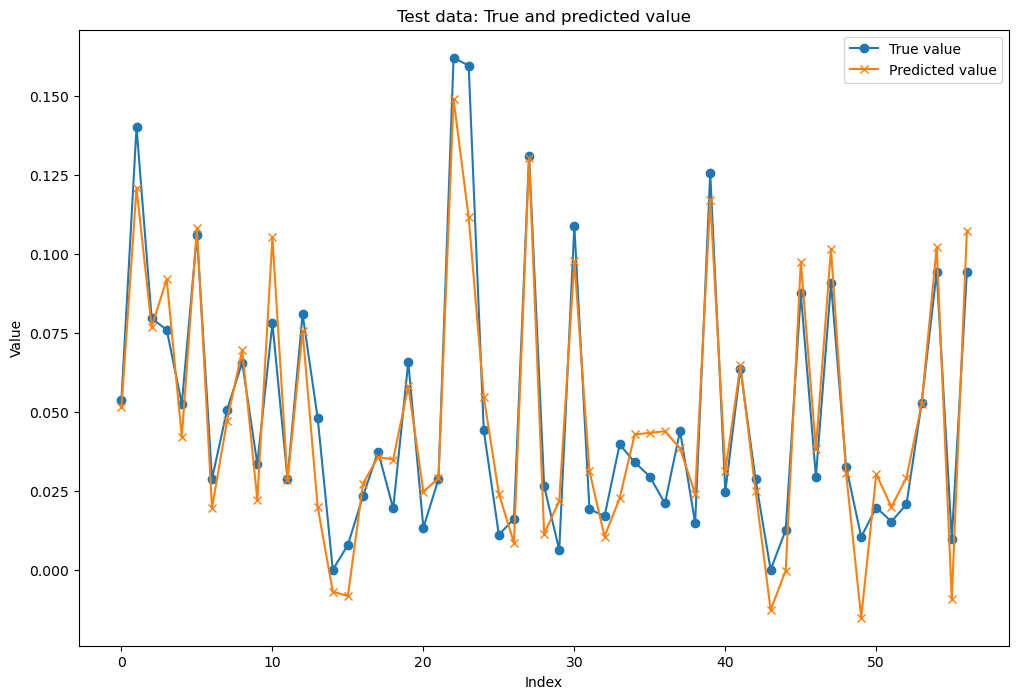

Outer fold iteration: 6/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


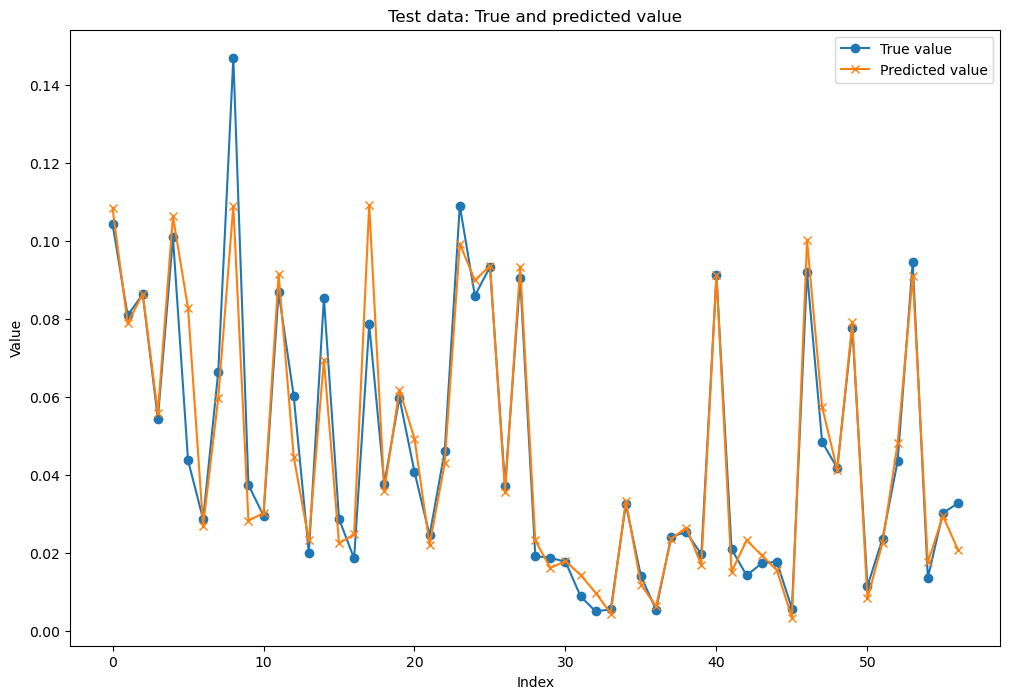

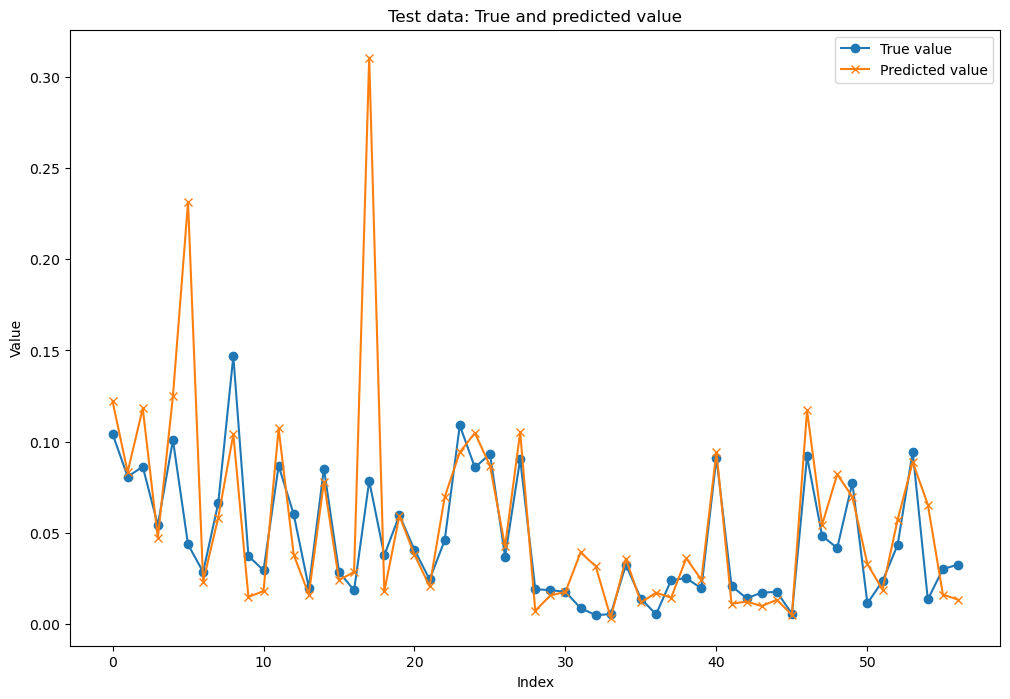

Outer fold iteration: 7/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


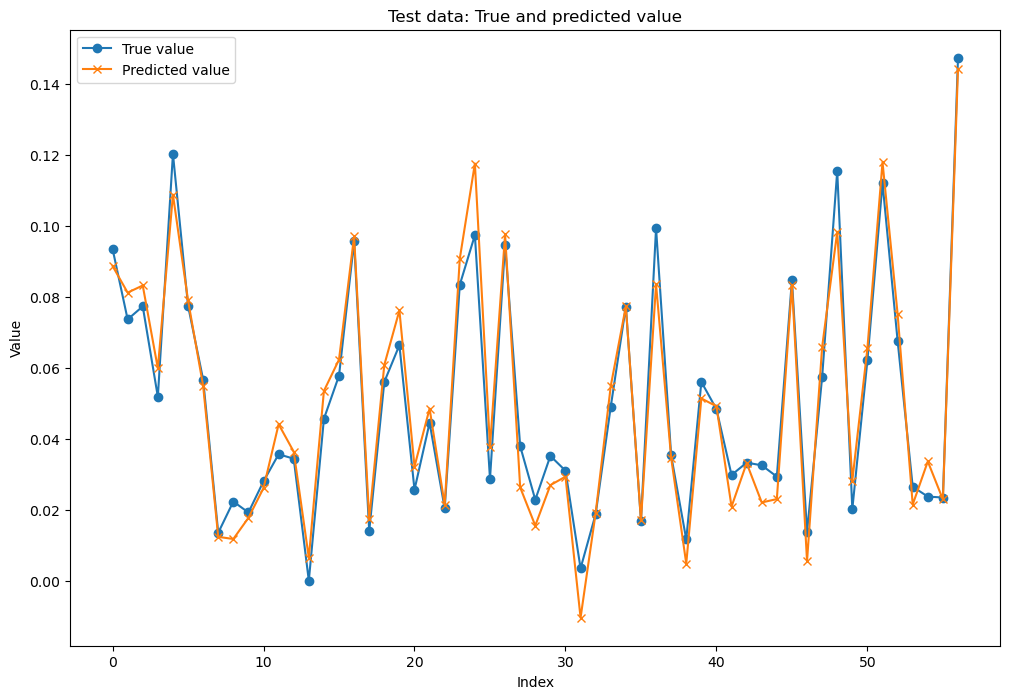

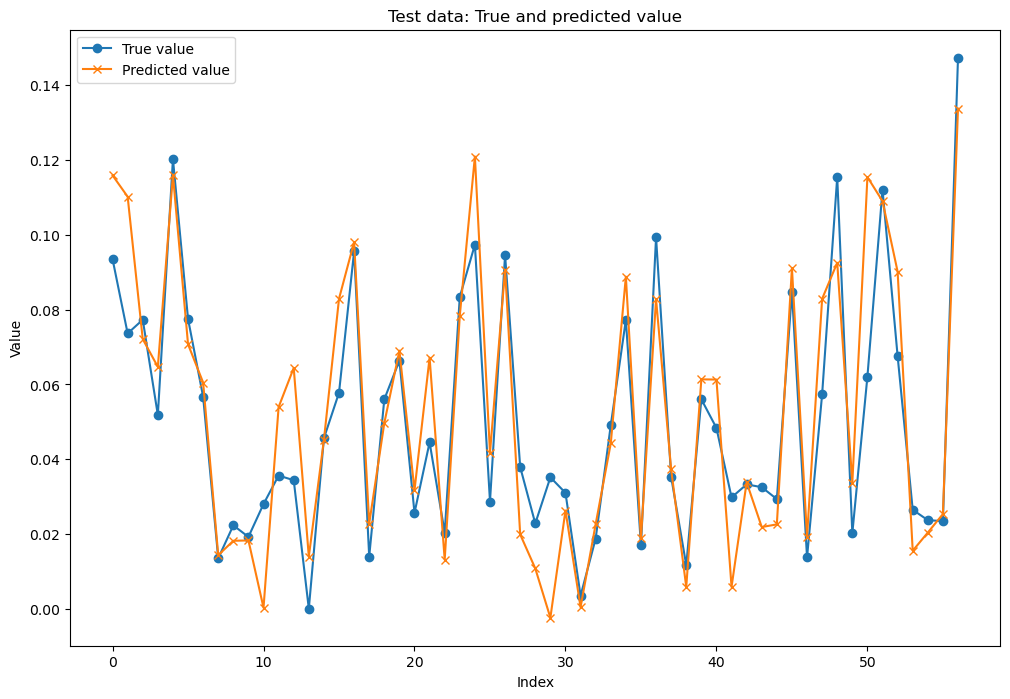

Outer fold iteration: 8/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


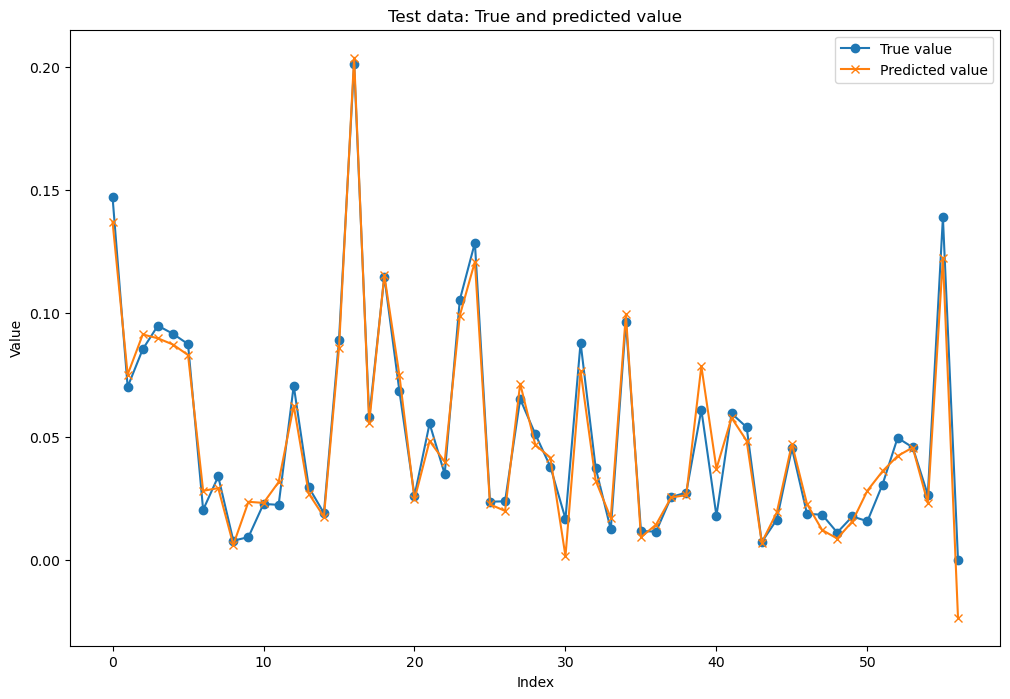

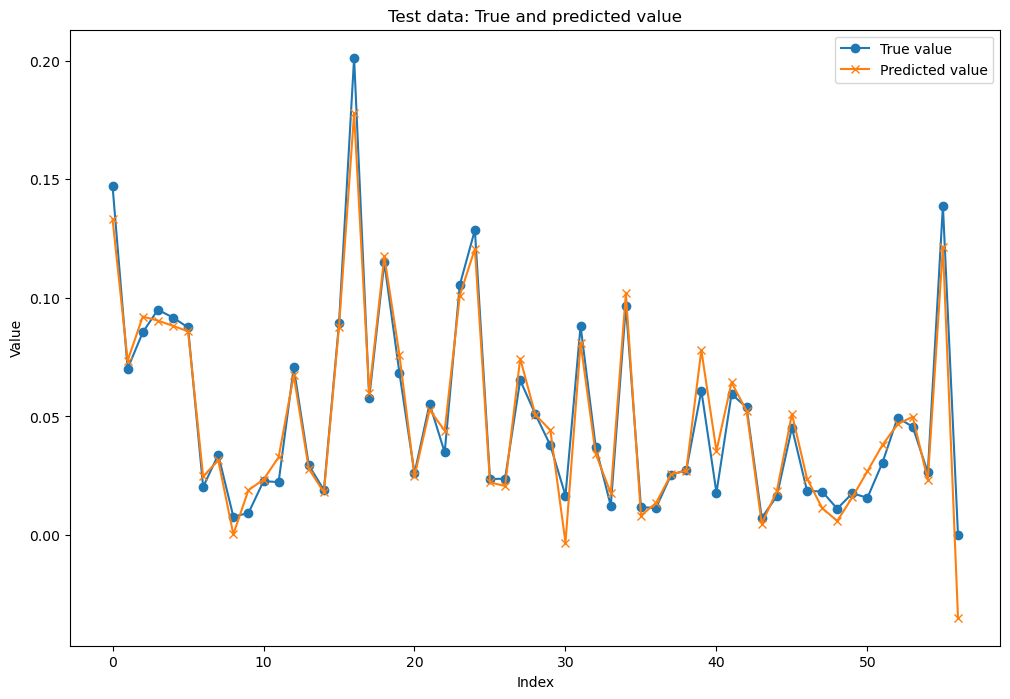

Outer fold iteration: 9/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


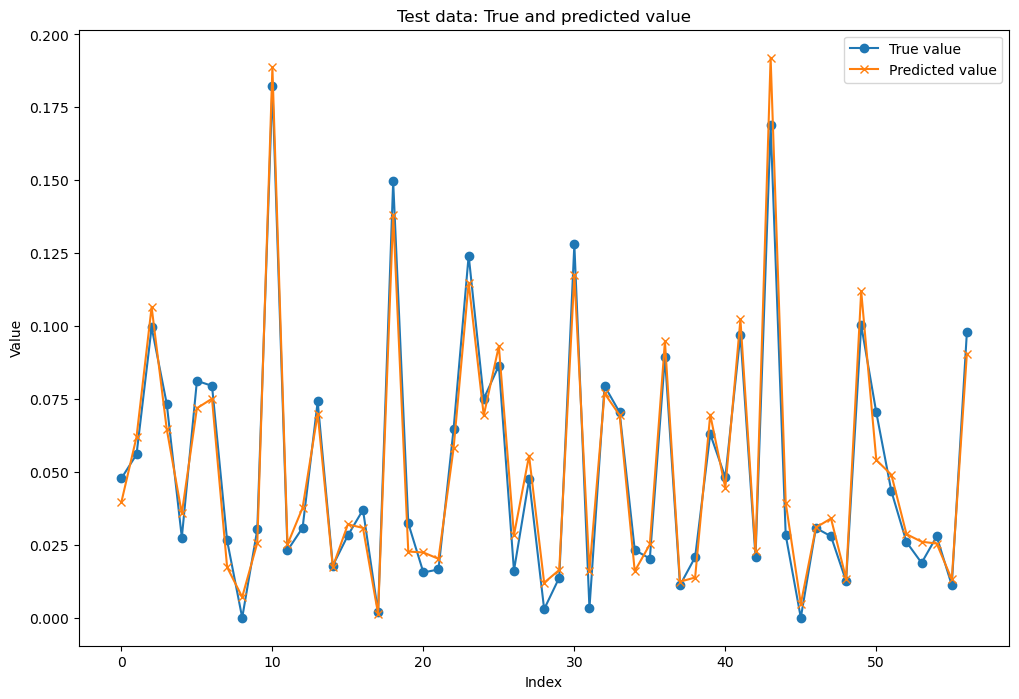

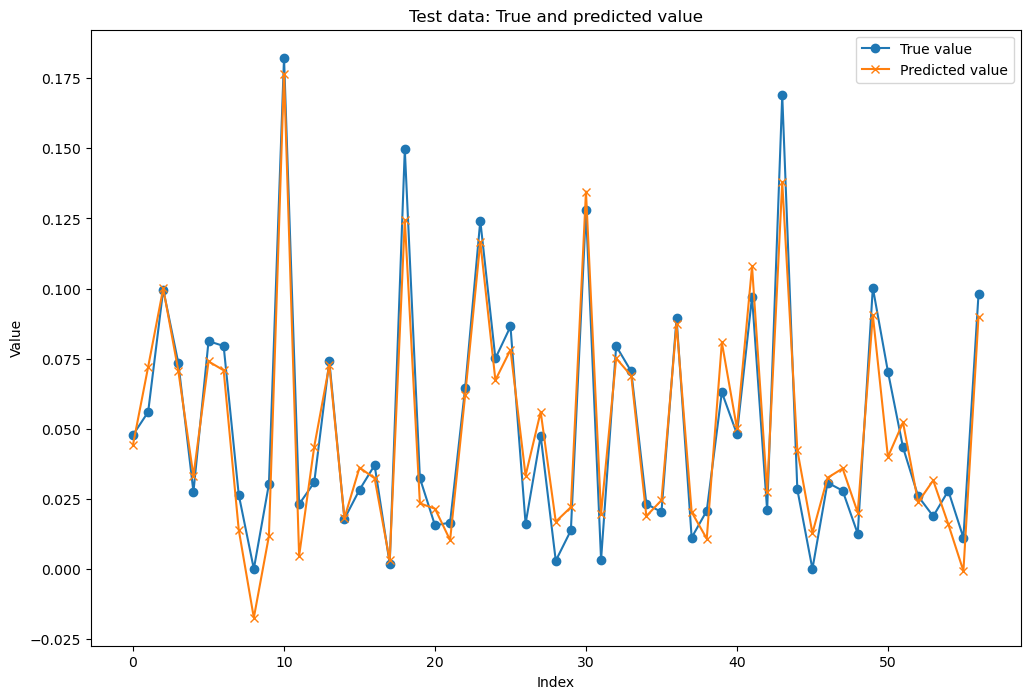

Outer fold iteration: 10/10
    Inner fold iteration: 1/10
    Inner fold iteration: 2/10
    Inner fold iteration: 3/10
    Inner fold iteration: 4/10
    Inner fold iteration: 5/10
    Inner fold iteration: 6/10
    Inner fold iteration: 7/10
    Inner fold iteration: 8/10
    Inner fold iteration: 9/10
    Inner fold iteration: 10/10


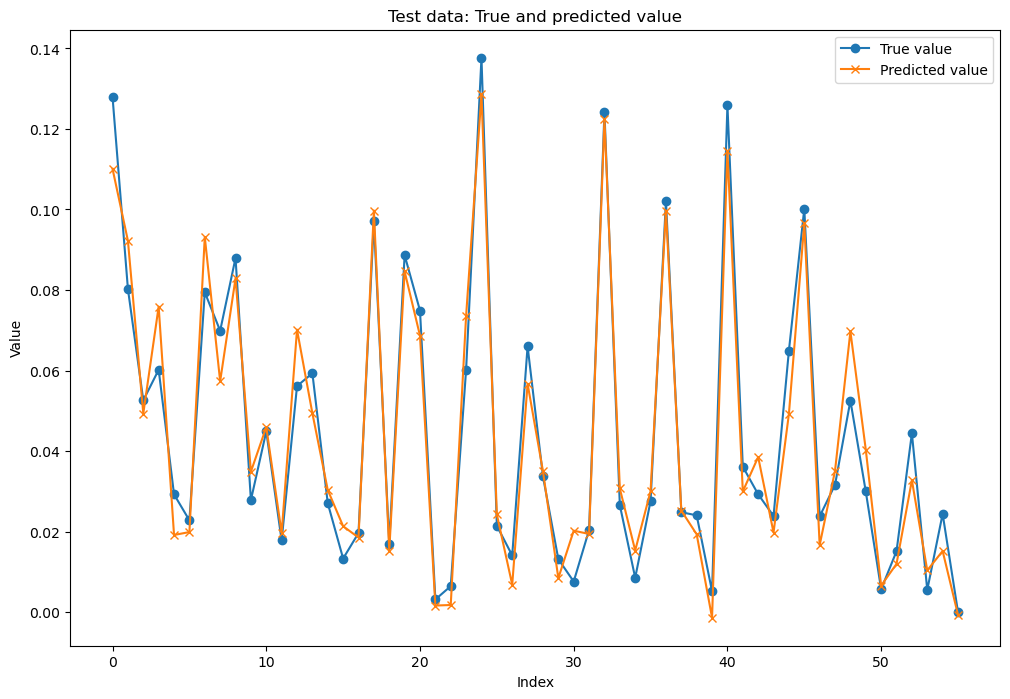

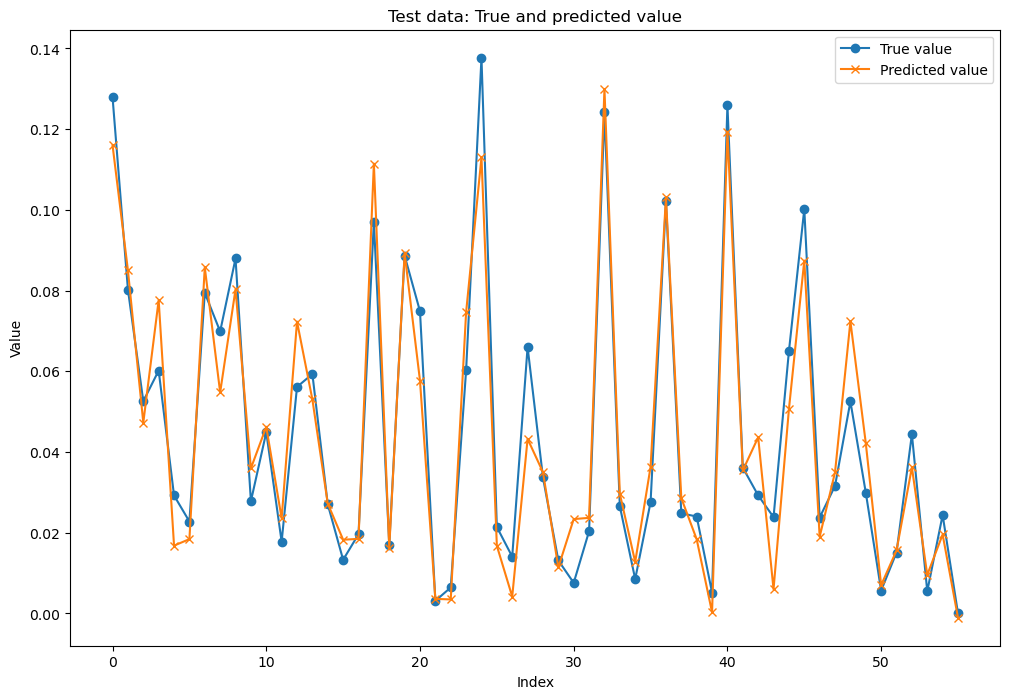

  Fold    Best h    ANN error    Best lambda    Linear regression error    Baseline error
------  --------  -----------  -------------  -------------------------  ----------------
     0         1  0.000133867       13.2571                 7.7538e-05         0.00108814
     1         1  0.000145916       13.2571                 9.98552e-05        0.00206708
     2         1  0.000386436       13.2571                 5.94948e-05        0.00164546
     3         5  0.000455867        8.28643                9.23297e-05        0.0015675
     4         1  0.000180943        8.28643                6.7607e-05         0.00164106
     5         5  0.00184294         5.17947                9.59852e-05        0.00113454
     6         5  0.000261639        8.28643                5.52487e-05        0.0010904
     7         1  7.98896e-05       13.2571                 5.76715e-05        0.00169854
     8         1  0.000132787        8.28643                5.81293e-05        0.00181855
     9      

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid, plot)
from toolbox_02450 import rlr_validate, train_neural_net, draw_neural_net
import torch
from scipy import stats
from tabulate import tabulate
import numpy as np, scipy.stats as st

# Load Matlab data file and extract variables of interest
filename = "data_mean_10.csv"
df = pd.read_csv(filename)
raw_data = df.values
cols = np.r_[1:9, 10:12]
X = raw_data[:, cols]
y = raw_data[:, [9]]
attributeNames = np.asarray(df.columns[cols])

N, M = X.shape

# standardize data
X = stats.zscore(X)
# add offset attribute for w_0
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
attributeNames = [u'offset']+list(attributeNames)
M = M+1

# Linear Regression parameters
lambdas = np.power(10.,range(-5,8))
lambdas = np.logspace(-5, 5, 50)

# ANN parameters
possible_hs = [1, 3, 5, 10]
n_replicates = 3
max_iter = 2000

# K-fold crossvalidation
K = 10
CV = model_selection.KFold(K, shuffle=True)

resume = []
zLinearRegression = []
zANN = []
zBaseline = []

for i, (train_index_out, test_index_out) in enumerate(CV.split(X,y)):
    print(f'Outer fold iteration: {i+1}/{K}')

    X_train_out = X[train_index_out]
    y_train_out = y[train_index_out]
    X_test_out = X[test_index_out]
    y_test_out = y[test_index_out]

    for j, (train_index, test_index) in enumerate(CV.split(X_train_out,y_train_out)):
        print(f'    Inner fold iteration: {j+1}/{K}')

        X_train = X_train_out[train_index]
        y_train = y_train_out[train_index]
        X_test = X_train_out[test_index]
        y_test = y_train_out[test_index]

        #!##############################
        #!##### Linear Regression ######
        #!##############################
        opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = rlr_validate(X_train, y_train.squeeze(), lambdas, K)
        best_lambda = opt_lambda

        #!##############################
        #!########### ANN ##############
        #!##############################
        # We find the best h
        best_h = 0
        best_performance = 1000000

        for n_hidden_units in possible_hs:
            # Define the model
            model = lambda: torch.nn.Sequential(
                                torch.nn.Linear(M-1, n_hidden_units), #M features to n_hidden_units
                                torch.nn.Tanh(),   # 1st transfer function,
                                torch.nn.Linear(n_hidden_units, 1), # n_hidden_units to 1 output neuron
                                )
            loss_fn = torch.nn.MSELoss() # notice how this is now a mean-squared-error loss

            X_train_ann = torch.Tensor(X_train[:, 1:])
            y_train_ann = torch.Tensor(y_train)
            X_test_ann = torch.Tensor(X_test[:, 1:])
            y_test_ann = torch.Tensor(y_test)

            # Train the net on training data
            net, final_loss, learning_curve = train_neural_net(model,
                                                            loss_fn,
                                                            X=X_train_ann,
                                                            y=y_train_ann,
                                                            n_replicates=n_replicates,
                                                            max_iter=max_iter)

            y_test_est = net(X_test_ann)

            # Determine errors and errors
            se = (y_test_est.float()-y_test_ann.float())**2 # squared error
            mse = (sum(se).type(torch.float)/len(y_test_ann)).data.numpy() #mean

            if mse < best_performance:
                best_performance = mse
                best_h = n_hidden_units

    #!##############################
    #!##### Baseline Model #########
    #!##############################
    y_mean = np.mean(y_train_out)

    #! Squared error loss per observation of baseline model
    E_baseline = np.square(y_test_out - y_mean).sum()/y_test_out.shape[0]
    zBaseline.append(np.square(y_test_out - y_mean))

    #!##############################
    #! TRAIN LINEAR REGRESSION ON OUTER FOLD
    #!##############################
    Xty = X_train_out.T @ y_train_out
    XtX = X_train_out.T @ X_train_out
    lambdaI = best_lambda * np.eye(M)
    lambdaI[0,0] = 0 # remove bias regularization
    w = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
    predicted_y = X_test_out @ w

    plt.figure(figsize=(12,8))
    plt.plot(y_test_out, 'o-', label='True value')
    plt.plot(predicted_y, 'x-', label='Predicted value')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Test data: True and predicted value')
    plt.legend()
    plt.show()

    #! Squared error loss per observation of linear regression   
    se_l = np.square(y_test_out.squeeze() - predicted_y)
    E_linear_regression = se_l.sum()/y_test_out.shape[0]
    zLinearRegression.append(se_l)

    #!##############################
    #! TRAIN ANN ON OUTER FOLD
    #!##############################
    # Define the model
    model = lambda: torch.nn.Sequential(
                        torch.nn.Linear(M-1, best_h), #M features to n_hidden_units
                        torch.nn.Tanh(),   # 1st transfer function,
                        torch.nn.Linear(best_h, 1), # n_hidden_units to 1 output neuron
                        )
    loss_fn = torch.nn.MSELoss() # notice how this is now a mean-squared-error loss

    X_train_ann = torch.Tensor(X_train_out[:, 1:])
    y_train_ann = torch.Tensor(y_train_out)
    X_test_ann = torch.Tensor(X_test_out[:, 1:])
    y_test_ann = torch.Tensor(y_test_out)

    # Train the net on training data
    net, final_loss, learning_curve = train_neural_net(model,
                                                    loss_fn,
                                                    X=X_train_ann,
                                                    y=y_train_ann,
                                                    n_replicates=n_replicates,
                                                    max_iter=max_iter)
    
    y_test_est = net(X_test_ann)

    plt.figure(figsize=(12,8))
    plt.plot(y_test_ann, 'o-', label='True value')
    plt.plot(y_test_est.float().data.numpy(), 'x-', label='Predicted value')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Test data: True and predicted value')
    plt.legend()
    plt.show()

    # Determine errors and errors
    se = (y_test_est.float()-y_test_ann.float())**2 # squared error
    E_ann = ((sum(se).type(torch.float)/len(y_test_ann)).data.numpy()[0]) #mean
    zANN.append(se.data.numpy())

    resume.append([i, best_h, E_ann, best_lambda, E_linear_regression, E_baseline])


print(tabulate(resume, headers=['Fold', 'Best h', 'ANN error', 'Best lambda', 'Linear regression error', 'Baseline error']))


#!##############################
#! PAIRED T-TEST ################
#!##############################

#! Linear regression vs ANN
for i in range(K):
    alpha = 0.05
    z = zLinearRegression[i] - zANN[i].squeeze()
    CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value
    print(f'Linear regression vs ANN: p={p:.10f}, CI=({CI[0]:.7f},{CI[1]:.7f})')

#! Linear regression vs Baseline
for i in range(K):
    alpha = 0.05
    z = zLinearRegression[i] - zBaseline[i].squeeze()
    CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value
    print(f'Linear regression vs Baseline: p={p:.10f}, CI=({CI[0]:.7f},{CI[1]:.7f})')

#! ANN vs Baseline
for i in range(K):
    alpha = 0.05
    z = zANN[i].squeeze() - zBaseline[i].squeeze()
    CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value
    print(f'ANN vs Baseline: p={p:.10f}, CI=({CI[0]:.7f},{CI[1]:.7f})')

In [51]:
for i in range(K):
    alpha = 0.05
    z = zLinearRegression[i] - zANN[i].squeeze()
    CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value
    print(f'Linear regression vs ANN: p={p:.10f}, CI=({CI[0]:.7f},{CI[1]:.7f})')
#! Linear regression vs Baseline

for i in range(K):
    alpha = 0.05
    z = zLinearRegression[i] - zBaseline[i].squeeze()
    CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value
    print(f'Linear regression vs Baseline: p={p:.10f}, CI=({CI[0]:.7f},{CI[1]:.7f})')
#! ANN vs Baseline

for i in range(K):
    alpha = 0.05
    z = zANN[i].squeeze() - zBaseline[i].squeeze()
    CI = st.t.interval(1-alpha, len(z)-1, loc=np.mean(z), scale=st.sem(z))  # Confidence interval
    p = 2*st.t.cdf( -np.abs( np.mean(z) )/st.sem(z), df=len(z)-1)  # p-value
    print(f'ANN vs Baseline: p={p:.10f}, CI=({CI[0]:.7f},{CI[1]:.7f})')

Linear regression vs ANN: p=0.0164402379, CI=(-0.0001019,-0.0000107)
Linear regression vs ANN: p=0.2193346274, CI=(-0.0001203,0.0000282)
Linear regression vs ANN: p=0.0126530189, CI=(-0.0005812,-0.0000727)
Linear regression vs ANN: p=0.0013383319, CI=(-0.0005792,-0.0001479)
Linear regression vs ANN: p=0.0038399791, CI=(-0.0001886,-0.0000381)
Linear regression vs ANN: p=0.1129722950, CI=(-0.0039203,0.0004264)
Linear regression vs ANN: p=0.0017048722, CI=(-0.0003318,-0.0000810)
Linear regression vs ANN: p=0.1652436178, CI=(-0.0000539,0.0000094)
Linear regression vs ANN: p=0.0002357118, CI=(-0.0001127,-0.0000366)
Linear regression vs ANN: p=0.0496474363, CI=(-0.0000640,-0.0000001)
Linear regression vs Baseline: p=0.0000254368, CI=(-0.0014516,-0.0005696)
Linear regression vs Baseline: p=0.0000567403, CI=(-0.0028716,-0.0010628)
Linear regression vs Baseline: p=0.0004186862, CI=(-0.0024328,-0.0007391)
Linear regression vs Baseline: p=0.0001642899, CI=(-0.0022066,-0.0007438)
Linear regression